## Продвинутое машинное обучение: Домашнее задание 3 
### Александр Минаков, группа MADE-ML-21


Третье домашнее задание посвящено достаточно простой, но, надеюсь, интересной задаче, в которой потребуется творчески применить методы сэмплирования. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Как всегда, любые комментарии, новые идеи и рассуждения на тему категорически приветствуются. 

В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:


Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.

В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:


https://www.dropbox.com/s/k23enjvr3fb40o5/corpora.zip 

## Задание 1
Реализуйте базовый частотный метод по Шерлоку Холмсу:

- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);

- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;

- расшифруйте их таким частотным методом.


In [551]:
from collections import Counter
from copy import copy
import tqdm

import numpy as np
import nltk
from nltk import everygrams
import matplotlib.pyplot as plt
import re

RUS_CORPUS_PATH = "corpora/WarAndPeace.txt"
ENG_CORPUS_PATH = "corpora/WarAndPeaceEng.txt"

RUS_ALF = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"
ENG_ALF = "abcdefghijklmnopqrstuvwxyz"
SPACE = " "

In [384]:
def preprocess_text(text, alf):
    text = text.lower()
    tokens = nltk.WordPunctTokenizer().tokenize(text)

    tokens = [tok for tok in tokens if tok.isalpha() and all([letter in alf for letter in tok])]

    return " ".join(tokens)

In [386]:
def count_letter_freqs(text: str, alf=None):
    if alf is not None:
        text = preprocess_text(text, alf)

    count_symbols = Counter(text)

    # selected_symbols = {key: value for key, value in count_symbols.items() if key in list(alf)}
    total = sum(count_symbols.values())
    symbol_proba = {key : value / total for key, value in count_symbols.items()}

    return sorted([(k, v) for k, v in symbol_proba.items()], key=lambda x:x[1], reverse=True)

In [387]:
with open(RUS_CORPUS_PATH) as f_in:
    rus_corpus = f_in.readlines()
rus_corpus = ' '.join(rus_corpus)

with open(ENG_CORPUS_PATH) as f_in:
    en_corpus = f_in.readlines()
en_corpus = ' '.join(en_corpus)



freqs_corpus_rus = count_letter_freqs(text=rus_corpus, alf=RUS_ALF+SPACE)
freqs_corpus_eng = count_letter_freqs(text=en_corpus, alf=ENG_ALF+SPACE)

print(freqs_corpus_rus, len(freqs_corpus_rus), "\n")
print(freqs_corpus_eng, len(freqs_corpus_eng))

[(' ', 0.1622681921826889), ('о', 0.09523024960869923), ('а', 0.07024917348884852), ('е', 0.06606493649814181), ('и', 0.05569760338966717), ('н', 0.05457382800174706), ('т', 0.047579375379837634), ('с', 0.043704448627299816), ('л', 0.04238793721157597), ('в', 0.03857829201684264), ('р', 0.03816950511916216), ('к', 0.030040396849698538), ('д', 0.025467579157774645), ('м', 0.024775905509608048), ('у', 0.02401739598083209), ('п', 0.021518044910603124), ('я', 0.01939017699073779), ('г', 0.017369557344408402), ('ь', 0.01631572648270738), ('ы', 0.01590383093941716), ('з', 0.014919944603935234), ('б', 0.014469190990523293), ('ч', 0.011422718292980524), ('й', 0.009652344618235005), ('ж', 0.008486602514583434), ('ш', 0.007908394431172255), ('х', 0.007148330579591431), ('ю', 0.00543080388021145), ('ц', 0.0033868693918090295), ('э', 0.0025319918491312115), ('щ', 0.002353244726571304), ('ф', 0.001877621948281463), ('ё', 0.0006699131288984359), ('ъ', 0.0004398733537778593)] 34 

[(' ', 0.1853541580

<BarContainer object of 34 artists>

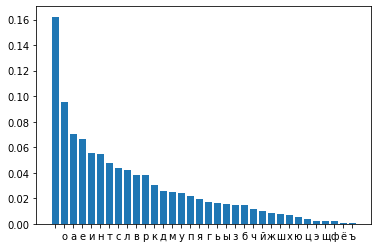

In [443]:
plt.bar(np.array(freqs_corpus_rus)[:,0],  np.array(freqs_corpus_rus)[:,1].astype(float))

Выберем несколько предложений и зашифруем случайной перестановкой

In [525]:
RUS_TEXT_FOR_TEST = """Так шло изо дня в день, мистер Холмс. В субботу мой хозяин выложил передо мной на стол четыре золотых соверена — плату за неделю. Так прошла и вторая неделя и третья. Каждое утро я приходил туда ровно к десяти и ровно в два уходил."""

# ENG_TEXT_FOR_TEST =

In [526]:
def encrypt(text, alf, seed=42):
    alf_nums = {i: ch for i, ch in enumerate(alf)}

    np.random.seed(seed) # Generate permutation
    permutation = list(np.random.permutation(list(alf)))

    permutation = {ch: alf_nums[permutation.index(ch)] for ch in alf}
    inv_permutation = {v: k for k, v in permutation.items()}

    enc_text = ''.join([permutation[ch] for ch in text])

    # dec_text = ''.join([inv_permutation[ch] for ch in enc_text])
    # print(dec_text)

    return enc_text, inv_permutation

In [527]:
def apply_permutation(text, permutation):
    return ''.join([permutation[ch] for ch in text])

Текст на русском языке:

In [528]:
text = preprocess_text(text=RUS_TEXT_FOR_TEST, alf=RUS_ALF+SPACE)
text

'так шло изо дня в день мистер холмс в субботу мой хозяин выложил передо мной на стол четыре золотых соверена плату за неделю так прошла и вторая неделя и третья каждое утро я приходил туда ровно к десяти и ровно в два уходил'

Зашифрованный текст:

In [529]:
enc_text, inv_permutation = encrypt(text, alf=RUS_ALF+SPACE, seed=42)
print(enc_text) #, inv_permutation)


бйпьщжаьидаькязьськняфьоишбнмьчажошьсьшыррабыьоаюьчадзияьс жаэижьлнмнкаьояаюьяйьшбажьенб мньдажаб чьшаснмняйьлжйбыьдйьянкнжцьбйпьлмащжйьиьсбамйзьянкнжзьиьбмнбфзьпйэканьыбмаьзьлмичакижьбыкйьмасяаьпькншзбиьиьмасяаьськсйьычакиж


Теперь расшифруем частотным методом

In [530]:
def decrypt_by_freqs_method(enc_text, corpus_freqs, alf):

    freqs = count_letter_freqs(enc_text, alf)
    
    #compare with corpus freqs
    permutation = {freqs[i][0]: corpus_freqs[i][0] for i in range(len(freqs))}
    
    decrypted_text = ''.join([permutation[ch] for ch in enc_text])
    
    return decrypted_text, permutation



In [531]:
def count_true_letter_permutations(permutation_1, permutation_2):

    counter = 0
    for k, v in permutation_1.items():
        if permutation_2[k] == v:
            counter += 1
    
    return counter


def metric_count_percentage_true_enc(true_text, decrypted_text):
    return sum([true_text[i] == decrypted_text[i] for i in range(len(decrypted_text))]) / len(decrypted_text)

In [545]:
text

'так шло изо дня в день мистер холмс в субботу мой хозяин выложил передо мной на стол четыре золотых соверена плату за неделю так прошла и вторая неделя и третья каждое утро я приходил туда ровно к десяти и ровно в два уходил'

In [532]:
decrypted_text, dec_permutation_uno = decrypt_by_freqs_method(enc_text, corpus_freqs=freqs_corpus_rus, alf=RUS_ALF+SPACE)
decrypted_text

'енп зио тяо свк р савб гтдеал уоигд р дмччоем гой уояктв рыиожти ьаласо гвой вн деои шаеыла яоиоеыу доралавн ьинем ян васаих енп ьлозин т реолнк васаик т елаебк пнжсоа мело к ьлтуости емсн лорво п садкет т лорво р срн муости'

In [533]:
# count_true_letter_permutations(inv_permutation, dec_permutation)

Доля правильно расшифрованных символов:

In [534]:
metric_count_percentage_true_enc(text, decrypted_text)

0.32142857142857145

## Задание 2
Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:

- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм. (В качестве естественной метрики качества можно взять долю правильно расшифрованных букв или, если хочется совсем математически изощриться, расстояние между двумя перестановками, правильной и полученной из модели; но, честно говоря, в этом задании следить за численными метриками не так уж обязательно, будет и глазами всё видно.)
)

In [535]:
def count_bigram_freqs(text: str, alf):
    text = preprocess_text(text, alf)

    bigrams = [text[i:i+2] for i in range(len(text) - 1)]
    count_bigrams = Counter(bigrams)

    total = sum(count_bigrams.values())

    bigrams_proba = {key : value / total for key, value in count_bigrams.items()}

    return sorted([(k, v) for k, v in bigrams_proba.items()], key=lambda x:x[1], reverse=True)

In [536]:
bigrams_corpus_rus = count_bigram_freqs(text=rus_corpus, alf=RUS_ALF+SPACE)
bigrams_corpus_eng = count_bigram_freqs(text=en_corpus, alf=ENG_ALF+SPACE)

# print(bigrams_corpus_rus[:20], len(bigrams_corpus_rus))
# print(bigrams_corpus_eng[:100], len(bigrams_corpus_eng))

Зашифруем текст

In [537]:
text = preprocess_text(text=RUS_TEXT_FOR_TEST, alf=RUS_ALF+SPACE)
enc_text, inv_permutation = encrypt(text, alf=RUS_ALF+SPACE, seed=42)
# print(enc_text, inv_permutation)

Расшифруем

In [538]:
def get_inv_permutation_bigram(corpus_freqs, text_freqs, init_mapping=None):

    if init_mapping is None:
        init_mapping = []
    reverse_mapping = {k: v for k, v in init_mapping}
    
    for text_bigram, text_freq in text_freqs:

        filtred_freqs = copy(corpus_freqs)
        
        if text_bigram[0] in reverse_mapping.keys():
            filtred_freqs = [(bigram, freq) for bigram, freq in filtred_freqs if bigram[0] == reverse_mapping[text_bigram[0]]]
            
        if text_bigram[1] in reverse_mapping.keys():
            filtred_freqs = [(bigram, freq) for bigram, freq in filtred_freqs if bigram[1] == reverse_mapping[text_bigram[1]]]
              
        min_diff = 1
        best_bigram = None
        for bigram, freq in filtred_freqs:
            diff = abs(freq - text_freq)
            if diff < min_diff:
                best_bigram = bigram
                min_diff = diff
                
        if text_bigram[0] not in reverse_mapping.keys():
            reverse_mapping[text_bigram[0]] = best_bigram[0]
            
        if text_bigram[1] not in reverse_mapping.keys():
            reverse_mapping[text_bigram[1]] = best_bigram[1]

        
    return reverse_mapping

Подсчитаем частоты биграм в зашифрованном тексте

In [539]:
bigrams_freqs = count_bigram_freqs(enc_text, alf=RUS_ALF+SPACE)

Расшифруем:

In [546]:
text

'так шло изо дня в день мистер холмс в субботу мой хозяин выложил передо мной на стол четыре золотых соверена плату за неделю так прошла и вторая неделя и третья каждое утро я приходил туда ровно к десяти и ровно в два уходил'

In [540]:
dec_permutation = get_inv_permutation_bigram(bigrams_corpus_rus, bigrams_freqs)
decrypted_text = apply_permutation(enc_text, dec_permutation)
print(decrypted_text)

тое сто сго сто с стте нснттс тотнн с ноддото нов тогост сатодст стстсо нтов то нтот рттаст гототат ностстто стото го ттстте тое ссосто с стосоо ттстто с тсттео еодсот отсо о ссстосст тосо состо е стнотс с состо с ссо отосст


In [541]:
metric_count_percentage_true_enc(text, decrypted_text)

0.35267857142857145

Качество на биграммах упало даже ниже чем для простого частотного метода. Но поскольку биграмм больше чем одиночных символов это кажется закономерным.

Попробуем добавить найденные с помощью посимвольного частотного метода первые несколько букв

In [542]:
init_mapping = list(dec_permutation_uno.items())[:2]
init_mapping

[('ь', ' '), ('а', 'о')]

In [547]:
text

'так шло изо дня в день мистер холмс в субботу мой хозяин выложил передо мной на стол четыре золотых соверена плату за неделю так прошла и вторая неделя и третья каждое утро я приходил туда ровно к десяти и ровно в два уходил'

In [548]:
dec_permutation = get_inv_permutation_bigram(bigrams_corpus_rus, bigrams_freqs, init_mapping)
decrypted_text = apply_permutation(enc_text, dec_permutation)
print(decrypted_text)

тое сто сго сто с стте нснттс тотнн с ноддото нов тогост сатодст стстсо нтов то нтот рттаст гототат ностстто стото го ттстте тое ссосто с стосоо ттстто с тсттео еодсот отсо о ссстосст тосо состо е стнотс с состо с ссо отосст


In [549]:
metric_count_percentage_true_enc(text, decrypted_text)

0.35267857142857145

Качество получилось немного лучше, чем для посимвольного частотного метода. Но все равно не достаточно хорошее.

## Задание 3

Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:

- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.


#### Метод

Текст, разбитый на биграммы - это, по сути, марковская цепь. Частота биграмм - вероятность перехода по цепи.

Для обучения перестановки будем считать вероятность порождения именно такого текста как произведение вероятностей всех биграмм, в него входящих.

Всего перестановок очень много, поэтому сделаем жадный алгоритм, который использует идею MCMC-семплирования.

Алгоритм:

0) Инициализируем перестановки, восстанавливаем текст и считаем на нем $p_{cur}$

1) Меняем местами пару букв для перестановки

2) Восстанавливаем текст с новой перестановкой и считаем на нем $p_{prop}$

3) Принимаем новую перестановку с "вероятностью" $p_{new} = \frac{p_{prop}}{p_{cur}}$
 

4) Возвращаемся к пункту 1


In [557]:
def get_freqs_smooth(text, min_freq=0, n_gram=2):    
    freqs = dict()
    vocab_len = len(set(text))**n_gram
    if n_gram > 1:
        text = [''.join(ngram) for ngram in everygrams(text, min_len=n_gram, max_len=n_gram)]
    for key, value in Counter(text).items():
        freqs[key] = (value + 1) / (len(text) + vocab_len) # Сглаживаем, чтобы не было нулей
    return freqs

def get_text_proba(text, mapping, freqs, n_gram=2):
    decoded_text = apply_permutation(text, mapping)
    log_proba = 0
    for i in range(len(decoded_text) - n_gram):
        bigram = decoded_text[i: i + n_gram]
        bigram_proba = freqs.get(bigram)
        if bigram_proba is None:
            bigram_proba = 1 / (len(text) + len(RUS_ALF+SPACE)**n_gram) # Сглаживаем, чтобы не было нулей
            
        log_proba += np.log(bigram_proba)
    return log_proba
        
def get_reverse_mapping_mcmc(encoded_text, alf_encoded, alf_corpus, freqs_corpus, n_iters=10000, n_trials=10, n_gram=2):

    accept_count = 0
    best_mapping = None
    all_mappings = []
    best_log_likekihood = -np.inf

    for trial in tqdm.tqdm(range(n_trials), leave=False, position=0, total=n_trials):

        alf_encoded = list(alf_encoded)
        alf_iter = list(alf_corpus)
        reverse_mapping = {k: v for k, v in zip(alf_encoded, alf_iter[:len(alf_encoded)])}
        log_proba_current = get_text_proba(encoded_text, reverse_mapping, freqs_corpus, n_gram=n_gram)

        for i in range(n_iters):
            alf_proposal = alf_iter[:]
            idx1, idx2 = np.random.choice(len(alf_proposal), replace=False, size=2)
            alf_proposal[idx1], alf_proposal[idx2] = alf_proposal[idx2], alf_proposal[idx1]
            reverse_mapping_proposal = {k: v for k, v in zip(alf_encoded, alf_proposal[:len(alf_encoded)])}
            log_proba_proposal = get_text_proba(encoded_text, reverse_mapping_proposal, freqs_corpus, n_gram=n_gram)

            p_accept = np.exp(log_proba_proposal - log_proba_current)

            if p_accept > np.random.rand():
                accept_count += 1
                alf_iter = alf_proposal
                log_proba_current = log_proba_proposal
                reverse_mapping = reverse_mapping_proposal

        if log_proba_current > best_log_likekihood:
            best_log_likekihood = log_proba_current
            best_mapping = reverse_mapping
            
        all_mappings.append(reverse_mapping)


    print(f'Best likelihood: {best_log_likekihood}')        
    print(f'Accept raito: {accept_count / (n_iters * n_trials)}')
    return best_mapping, all_mappings

In [558]:
tokenized_corpus = preprocess_text(text=rus_corpus, alf=RUS_ALF+SPACE)

freqs_corpus = get_freqs_smooth(tokenized_corpus, n_gram=2)

In [559]:
best_reverse_mapping, _ = get_reverse_mapping_mcmc(
    enc_text, 
    alf_encoded=RUS_ALF+SPACE, 
    alf_corpus=RUS_ALF+SPACE,
    freqs_corpus=freqs_corpus
)

Best likelihood: -1200.7761239528713
Accept raito: 0.06567


In [562]:
print(text)

так шло изо дня в день мистер холмс в субботу мой хозяин выложил передо мной на стол четыре золотых соверена плату за неделю так прошла и вторая неделя и третья каждое утро я приходил туда ровно к десяти и ровно в два уходил


In [563]:
decrypted_text = apply_permutation(enc_text, best_reverse_mapping)
print(decrypted_text)

таз бло иго дня в день кистер молкс в сущщоту кой могяин выложил передо кной на стол четыре голотым соверена плату га неделх таз пробла и вторая неделя и третья заждое утро я примодил туда ровно з десяти и ровно в два умодил


In [564]:
metric_count_percentage_true_enc(text, decrypted_text)

0.9017857142857143

## Задание 4

Расшифруйте сообщение:

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏


Или это (они одинаковые, второй вариант просто на случай проблем с юникодом):


დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ


In [567]:
enc_text = """←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"""

In [576]:
enc_text_freqs = count_letter_freqs(enc_text)

<BarContainer object of 28 artists>

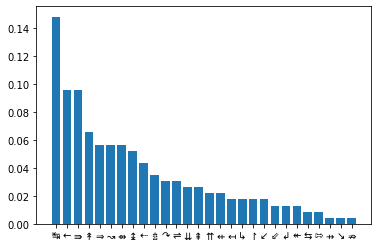

In [571]:
plt.bar(np.array(enc_text_freqs)[:,0],  np.array(enc_text_freqs)[:,1].astype(float))

In [577]:
alf_corpus = ''.join([c for c, _ in freqs_corpus_rus])
alf_message = ''.join([c for c, _ in enc_text_freqs])
alf_corpus, alf_message

(' оаеинтслвркдмупягьызбчйжшхюцэщфёъ', '↹←⇛↟⇒↝⇴↨⇠⇯↷⇌⇊⇞⇈⇷↤↳↾↙⇙↲↞⇆⇰⇸↘⇏')

In [578]:
freqs_corpus = get_freqs_smooth(tokenized_corpus, n_gram=2)

In [580]:
best_reverse_mapping, _ = get_reverse_mapping_mcmc(
    enc_text, 
    alf_encoded=alf_message, 
    alf_corpus=alf_corpus,
    freqs_corpus=freqs_corpus,
    n_iters=10000,
    n_trials=50,
)

Best likelihood: -1244.1855269452076
Accept raito: 0.055882


In [581]:
decrypted_text = apply_permutation(enc_text, best_reverse_mapping)
print(decrypted_text)

если вы вимите норзальный или подти норзальный текст у этого соочжения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл ба послемнее детвертое бамание курса хотя конедно я нидего не очежаф


# Задание 5 (Бонус)
 А что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

In [583]:
alf_corpus = ''.join([c for c, _ in freqs_corpus_rus])
alf_message = ''.join([c for c, _ in enc_text_freqs])
alf_corpus, alf_message

(' оаеинтслвркдмупягьызбчйжшхюцэщфёъ', '↹←⇛↟⇒↝⇴↨⇠⇯↷⇌⇊⇞⇈⇷↤↳↾↙⇙↲↞⇆⇰⇸↘⇏')

In [584]:
freqs_corpus_trigramm = get_freqs_smooth(tokenized_corpus, n_gram=3)

In [586]:
best_reverse_mapping, _ = get_reverse_mapping_mcmc(
    enc_text, 
    abc_encoded=alf_message, 
    abc_corpus=alf_corpus,
    freqs_corpus=freqs_corpus_trigramm,
    n_gram=3,
    n_iters=10000,
    n_trials=20,
)

Best likelihood: -1748.6109668625465
Accept raito: 0.05022


In [587]:
decrypted_text = apply_permutation(enc_text, best_reverse_mapping)
print(decrypted_text)

если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю


Качество улучшилось по сравнению с биграммами

## Задание 6 (Бонус)
Какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).


Скорее всего методы применяются в биоинформатике при обработке последовательностей ДНК.